# STOCK/CRPYTO PRICE PREDICTION MODEL

## The following code is an example on how to use simple data analysis tolls in order to set up a simple strategy for long and short term financial trading

### We will make use of the programing language python (3.x) which suits nicely for data anlysis

## --> This a very is simplified model for trading. One should always invest just as much money as one can afford to loose and do own studies in advance. 

## Required modules:
- numpy: the code is designed to be vectorized such that the numpy module can be used and calculations performed fast
- pandas: module for illustrative data frames
- yfinance: api module provided by yahoo finance to get current and previous asset prices
- matplotlib: (sub)module(s) for plots
- scipy: (sub)module for statistical and signal analysis
- datetime: (optional)

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [2]:
from model import MODEL
import utils, plotting, statistics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
tickers = ['TSLA', 'AAPL', 'AMZN']
#fix this for eval_model():
tickers = 'TSLA'
model = MODEL(tickers=tickers)

In [17]:
start_date = '2020-01-01'
model.get_data(start=start_date, interval='60m')

[*********************100%***********************]  1 of 1 completed


In [18]:
#edit this:
day_hour = 14
day_minute = 30
time_zone = 'America/New_York'
#do not edit below this line:
start_date_range = pd.Timestamp(2020, 1, 1, day_hour, day_minute)
date_range = utils.create_date_range(start_date=start_date_range, tz=time_zone)
model.apply_date_filter(date_range)
model.data.tail()

[WARNING]: Filter would result in 36 NaN values.
[USER-INPUT]: Remove NaN values?: y
[INFO]: filter applied.


,TSLA
Datetime,
2020-04-15 14:30:00-04:00,724.366882
2020-04-16 14:30:00-04:00,743.270020
2020-04-17 14:30:00-04:00,750.119995
2020-04-20 14:30:00-04:00,753.489990
2020-04-21 14:30:00-04:00,700.030029


In [19]:
model.eval_model()

|                                  PRICE MODEL                                   |
|                                  Version 0.3                                   |
|                   Authors: Marco Rosenzweig & Patrick Lorenz                   |
----------------------------------------------------------------------------------
|                               ticker = ['TSLA']                                |
|                             start date = 01/02/20                              |
|                              end date = 04/21/20                               |
|                      initial investment per ticker = 200                       |
[TICKER]: TSLA
[INFO]: 273.38 tax was paid.
----------------------------------------------------------------------------------
[SUMMARY]: Average trade win: 17.9809375201%
[SUMMARY]: Average trade loss: nan%
[SUMMARY]: Efficiency: 100.00%
[SUMMARY]: NET WIN: 820.15


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [20]:
model.ticker_df['TSLA']

,Buy Dates,Sell Dates,Buy Prices,Sell Prices,Trade Reward,Trade Win,Trade Efficiency
0,2020-01-06 19:30:00,2020-01-08 19:30:00,449.890907,490.289240,217.959168,17.959168,0.089796
1,2020-01-10 19:30:00,2020-01-14 19:30:00,478.212794,537.715092,245.079044,27.119876,0.124426
2,2020-01-17 19:30:00,2020-01-22 19:30:00,510.215336,565.168241,271.475360,26.396316,0.107705
3,2020-01-27 19:30:00,2020-02-04 19:30:00,557.911850,958.433320,466.365844,194.890484,0.717894
4,2020-02-06 19:30:00,2020-02-11 19:30:00,741.413903,767.503158,482.776566,16.410722,0.035189
5,2020-02-12 19:30:00,2020-02-19 19:30:00,774.594320,907.167851,565.404843,82.628277,0.171152
6,2020-02-28 19:30:00,2020-03-04 19:30:00,646.088209,739.263665,646.944567,81.539724,0.144215
7,2020-03-09 18:30:00,2020-03-11 18:30:00,616.412432,627.032315,658.090474,11.145907,0.017229
8,2020-03-17 18:30:00,2020-03-20 18:30:00,418.214319,435.208789,684.832501,26.742027,0.040636
9,2020-03-23 18:30:00,2020-03-25 18:30:00,428.086769,542.950906,868.586589,183.754088,0.268320


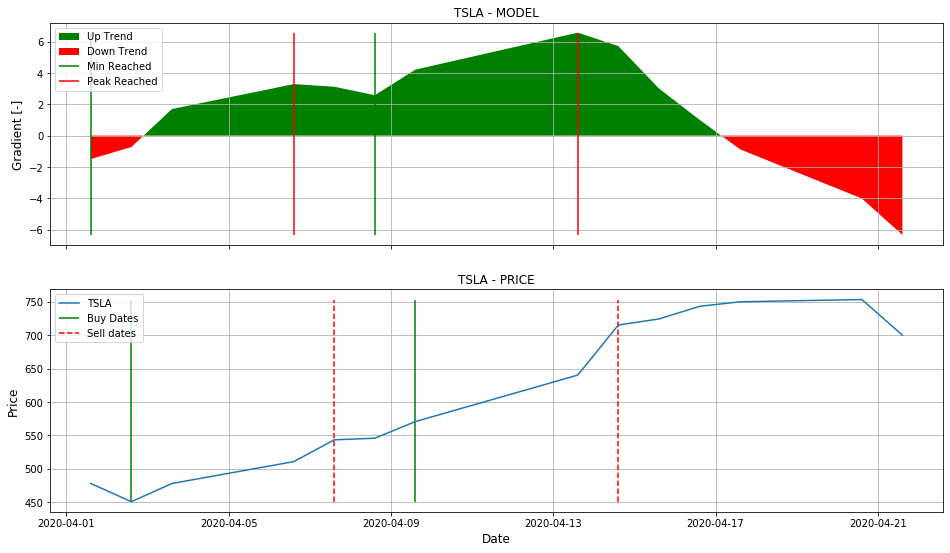

In [21]:
plotting.plot_model(model, plot_from_date='2020-04-01')

In [22]:
imag_model = model.copy_model()

In [23]:
imag_model.append_timedelta(timedelta=1)

[USER-INPUT]: Overwrite existing data? y


In [24]:
imag_model.data

,TSLA
2020-01-02 14:30:00-05:00,429.800507
2020-01-03 14:30:00-05:00,445.051514
2020-01-06 14:30:00-05:00,448.589996
2020-01-07 14:30:00-05:00,471.577301
2020-01-08 14:30:00-05:00,492.554993
...,...
2020-04-16 14:30:00-04:00,743.270020
2020-04-17 14:30:00-04:00,750.119995
2020-04-20 14:30:00-04:00,753.489990
2020-04-21 14:30:00-04:00,700.030029


In [25]:
imag_model.comp_break_values(['TSLA'])

[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: TSLA
[USER-INPUT]: Append breaking values w.r.t smallest tolerances? n
[INFO]: Current values: {'TSLA': 700.030029296875}
[INFO]: Break values: {'TSLA': [687.989512792991, 760.7926358398743]}
[INFO]: Tolerances: {'TSLA': array([-12.0405165 ,  60.76260654])}


In [26]:
imag_model.eval_model(tickers=['TSLA'])

|                                  PRICE MODEL                                   |
|                                  Version 0.3                                   |
|                   Authors: Marco Rosenzweig & Patrick Lorenz                   |
----------------------------------------------------------------------------------
|                               ticker = ['TSLA']                                |
|                             start date = 01/02/20                              |
|                              end date = 04/22/20                               |
|                      initial investment per ticker = 200                       |
[TICKER]: TSLA
[INFO]: 273.38 tax was paid.
----------------------------------------------------------------------------------
[SUMMARY]: Average trade win: 17.9809375201%
[SUMMARY]: Average trade loss: nan%
[SUMMARY]: Efficiency: 100.00%
[SUMMARY]: NET WIN: 820.15


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [27]:
imag_model.ticker_df['TSLA']

,Buy Dates,Sell Dates,Buy Prices,Sell Prices,Trade Reward,Trade Win,Trade Efficiency
0,2020-01-06 19:30:00,2020-01-08 19:30:00,449.890907,490.289240,217.959168,17.959168,0.089796
1,2020-01-10 19:30:00,2020-01-14 19:30:00,478.212794,537.715092,245.079044,27.119876,0.124426
2,2020-01-17 19:30:00,2020-01-22 19:30:00,510.215336,565.168241,271.475360,26.396316,0.107705
3,2020-01-27 19:30:00,2020-02-04 19:30:00,557.911850,958.433320,466.365844,194.890484,0.717894
4,2020-02-06 19:30:00,2020-02-11 19:30:00,741.413903,767.503158,482.776566,16.410722,0.035189
5,2020-02-12 19:30:00,2020-02-19 19:30:00,774.594320,907.167851,565.404843,82.628277,0.171152
6,2020-02-28 19:30:00,2020-03-04 19:30:00,646.088209,739.263665,646.944567,81.539724,0.144215
7,2020-03-09 18:30:00,2020-03-11 18:30:00,616.412432,627.032315,658.090474,11.145907,0.017229
8,2020-03-17 18:30:00,2020-03-20 18:30:00,418.214319,435.208789,684.832501,26.742027,0.040636
9,2020-03-23 18:30:00,2020-03-25 18:30:00,428.086769,542.950906,868.586589,183.754088,0.268320


In [28]:
imag_model._init_model()
imag_model.data.tail(1)

[INIT]: Initialising model for tickers: ['TSLA']
[INIT]: Successfully initialized model.
**********************************************************************************


,TSLA
2020-04-22 14:30:00-04:00,NaN


[INFO]: Current ticker: TSLA
----------------------------------------------------------------------------------
[INFO]: Result for value: 679.3896438830786


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


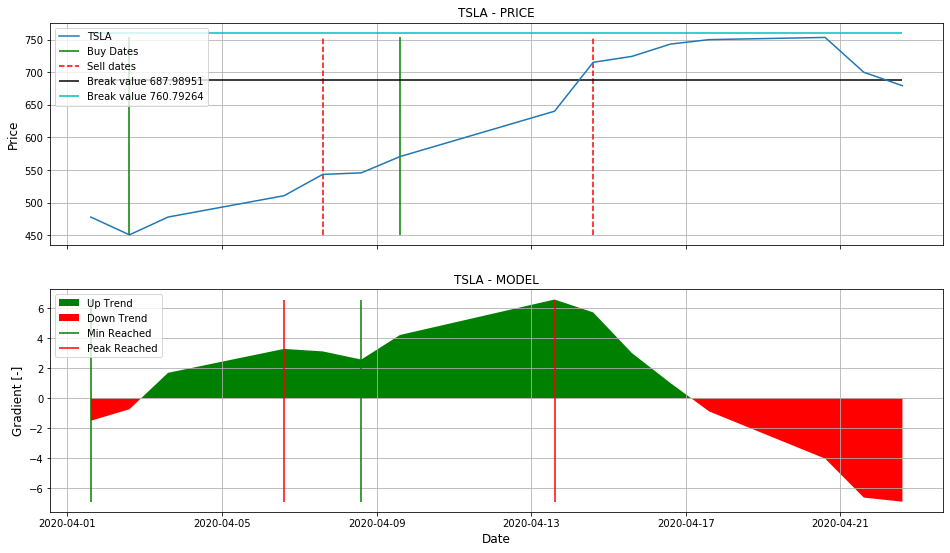

----------------------------------------------------------------------------------
[INFO]: Result for value: 724.3910743164327


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


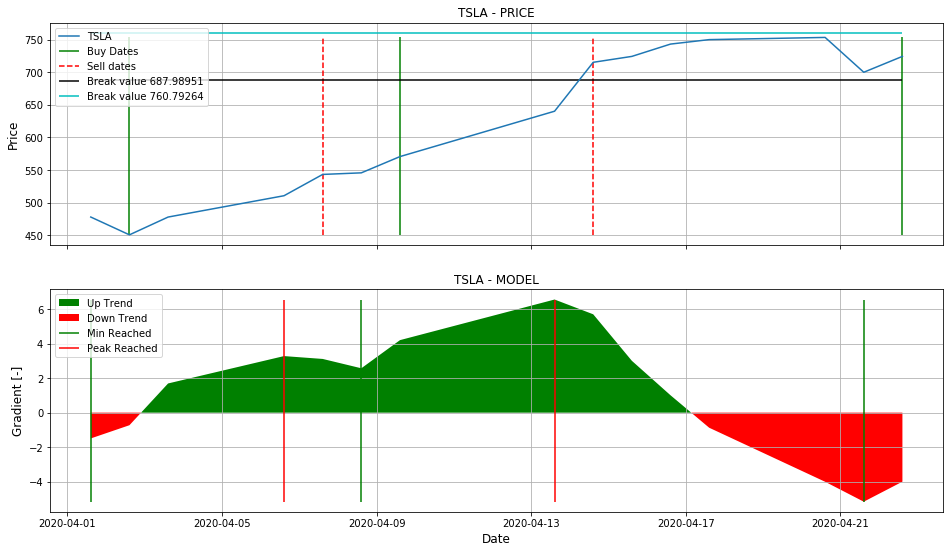

----------------------------------------------------------------------------------
[INFO]: Result for value: 770.3025437878727


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


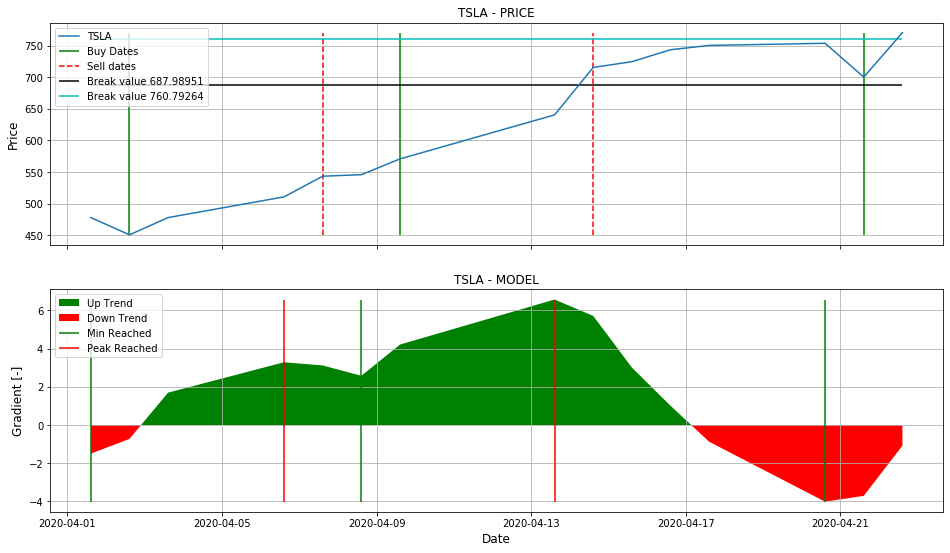

In [29]:
imag_model.show_possibilities(plot_from_date='2020-04-01', switch_axes=True)

[INFO]: Current ticker: TSLA
[*********************100%***********************]  1 of 1 completed


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site

[STATS-EVAL]: Probability for tol=17.76665: nan%
[STATS-EVAL]: Probability for tol=47.87962: nan%
[STATS-EVAL]: Probability between: nan%


posx and posy should be finite values
posx and posy should be finite values


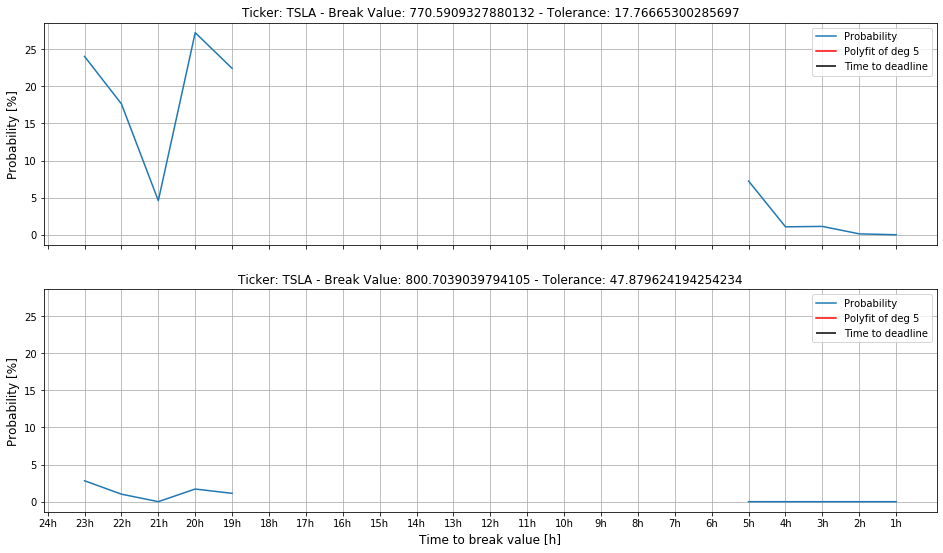

In [20]:
statistics.calc_probs(model=imag_model, stats_data=None, timezone=time_zone, start=pd.Timestamp(2019, 1, 1, 0, 30))

In [ ]:
#TODO: Implement this: 
#from model import STATISTICAL_MODEL
#stat_model = STATISTICAL_MODEL(imag_model)